<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/4%20-%20Wirtschaft%20und%20Entwicklung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wirtschaftswachstum und Entwicklung**

Wenn es um Ländervergleiche der Wirtschaft und Entwicklunggeht, bieten die OCED Daten einen der vollständigsten Datensätze. Zumindest für die Länder, welche zur Organisation für wirtschafliche Zusammenarbeit und Entwicklung gehören. Das sind aktuell 38 Länder. Die Daten können [hier](https://stats.oecd.org/) eingesehen und in verschiedene Themen unterteilt runtergeladen werden.

Nehmen wir uns zuerst einmal die Daten zur Wirtschaft vor und laden die nötigen Packages:

In [4]:
install.packages("zoo")
install.packages("Hmisc")
library(dplyr)
library(tidyverse)
library(zoo)
library(Hmisc)
download.file("https://github.com/cstecker/comparative_politics/blob/main/data/OECD.csv?raw=true", "OECD.csv")
OECD <- read.csv("OECD.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




Was haben die Daten uns zu bieten, was können wir damit analysieren?

In [6]:
glimpse(OECD)

Rows: 12,597
Columns: 19
$ LOCATION              <chr> "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "AUS",…
$ Country               <chr> "Australia", "Australia", "Australia", "Australi…
$ VAR                   <int> 101, 101, 101, 101, 101, 101, 101, 101, 101, 101…
$ Variable              <chr> "GDP: Total, constant prices", "GDP: Total, cons…
$ EDI                   <int> 202212, 202212, 202212, 202212, 202212, 202212, …
$ Edition               <chr> "December 2022", "December 2022", "December 2022…
$ FREQUENCY             <chr> "Q", "Q", "Q", "Q", "Q", "Q", "Q", "Q", "Q", "Q"…
$ Frequency             <chr> "Quarterly", "Quarterly", "Quarterly", "Quarterl…
$ TIME                  <chr> "2019-Q3", "2019-Q4", "2020-Q1", "2020-Q2", "202…
$ Time                  <chr> "Q3-2019", "Q4-2019", "Q1-2020", "Q2-2020", "Q3-…
$ Unit.Code             <chr> "NATCUR", "NATCUR", "NATCUR", "NATCUR", "NATCUR"…
$ Unit                  <chr> "National currency", "National currency", "Natio…
$ PowerCode.Cod

Unter der Variable "Variable" sind verschiedene Formen des BIP abgelegt. Die allgemeine Form des BIP ist hier unter "GDP: Total, constant prices" zu finden, weshalb wir diese herausfiltern wollen. Gleichzeitig ist unter "Edition" eine Vielzahl an Messzeitpunkten zu finden. Hier filtern wir den aktuellsten Zeitpunkt heraus. Abschließend filtern wir eine Reihe an Ländern heraus, damit die Grafiken übersichtlich bleiben.

In [14]:
OECD2 <- OECD %>% filter(Variable == "GDP: Total, constant prices" & Edition == "March 2023") %>%
  filter(Country == "Australia" | Country == "Germany" | Country == "Finland" | Country == "Sweden" | Country == "Norway" | Country == "Denmark")


Wenn wir uns die Variable "Time" anschauen können wir sehen, dass die Messungen in Quartale unterteilt sind. Für die Grafik müssen wir diese in ein Datum-Format transformieren. Dafür nutzen wir erst den Befehl "as.yearqtr", damit R erkennt, dass es sich bei der Variable "Time" um Angaben im Quartal-Jahr-Format handelt. Das hilft uns dabei, die Variable zu visualisieren.

In [15]:
OECD2$Date <- OECD2$Time %>%
  as.yearqtr(format = "Q%q-%Y")

Jetzt können wir eine Simple Grafik zur Veranschaulichung des BIPs erstellen. 

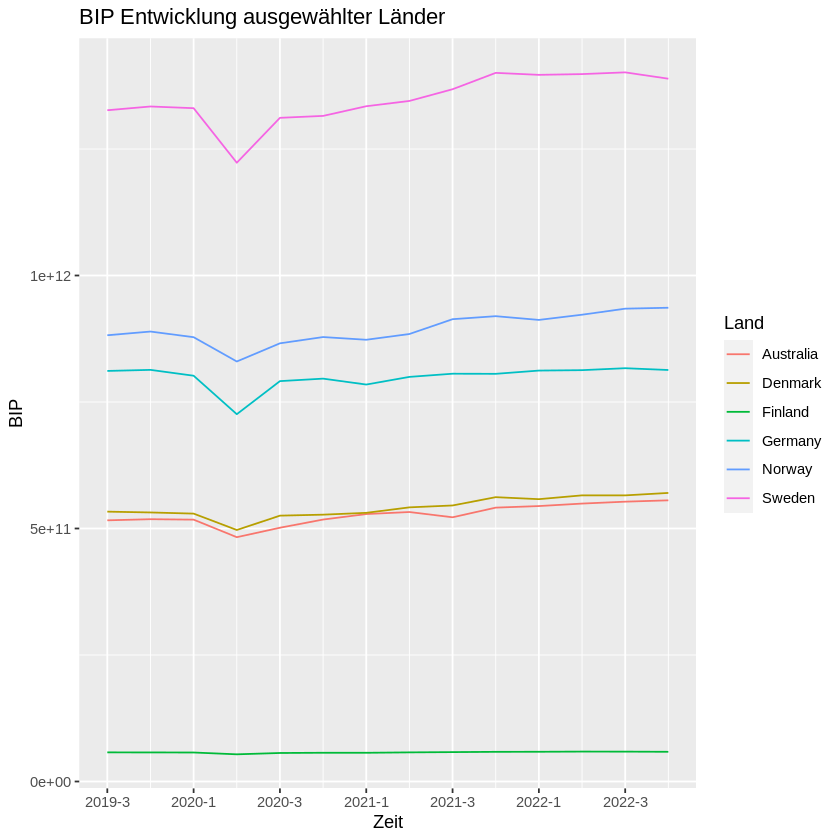

In [16]:

ggplot(OECD2, aes(x=Date, y=Value, color = Country)) + geom_line() +
  labs(title = "BIP Entwicklung ausgewählter Länder",
       x = "Zeit",
       y = "BIP",
       color = "Land")


Die Grafik hilft dabei, dass wir leichte Veränderungen des BIP erkennen können. Besonders auffällig ist dabei der Einbruch der Wirtschaft zu beginn der COVID-19 Pandemie. Dennoch ist diese Grafik nicht besonders aufschlussreich, wenn man Veränderungen zum Vorjahr wissen will. Dafür müssen wir eine eigene Variable erstellen, welche eben genau das misst. Wie geht das?

Wir gruppieren die Daten zuerst nach Ländern. Nach dieser Gruppierung erstellen wir eine Variable, welche den Wert des BIP aus dem Vorjahr enthält. Dafür nutzen wir einen sogenannten "Lag". Die Variable wird also "verzögert". Danach müssen wir nur noch eine Variable erstellen, welche die Differenz dieser beiden Variablen enthält. 

In [17]:
OECD2 <- OECD2 %>%
  group_by(Country) %>%
  mutate(lagval = lag(Value, n = 1, default = NA))
OECD2$diff <- OECD2$Value - OECD2$lagval


Jetzt können wir diese Differenz visualisieren

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


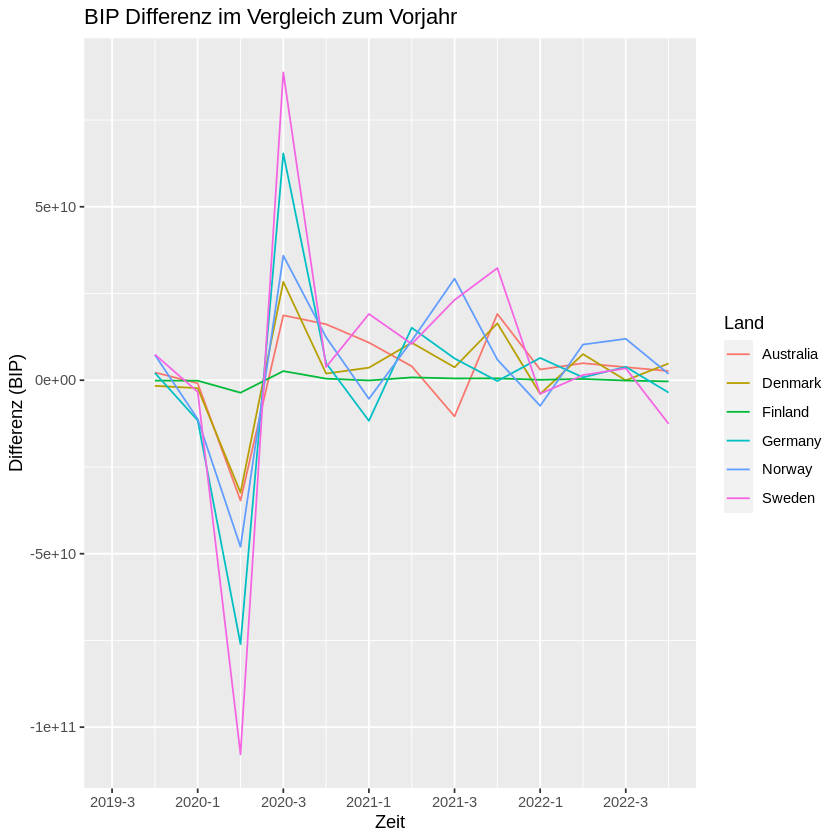

In [20]:
ggplot(OECD2, aes(x=Date, y=diff, color = Country)) + geom_line() +
  labs(title = "BIP Differenz im Vergleich zum Vorjahr",
       x = "Zeit",
       y = "Differenz (BIP)",
       color = "Land")


Hier wird der wirtschafliche Einbruch durch die Pandemie nochmal besonders deutlich. Anhand der Grafik könnte man meinen, dass es danach einen großen Aufschwung gab. Der schein trügt jedoch, das lediglich der geringe Wert zu beginn der Pandemie und der sich danach normalisierende Wert eine große Differenz bilden. Der "Aufschwung" ist also nur im Vergleich zum Vorjahr. 

Wie stark schwankt die Wirtschaft durschnittlich? Um einen genaueren Wert zu bekommen, schließen wir die Pandemie als Ausreißer aus. 